<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Introdu%C3%A7%C3%A3o_Python/Trabalho4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
# ! pip install windrose


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
URL = 'https://www.dropbox.com/s/yqb9yzf4y3jphwi/est-met-casa-2018_12_07_pto%2Bvirg.csv?dl=1'
dados = pd.read_csv(URL, sep = ';')
dados


,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
0,1,22/11/2018 23:17:47,5,22.7,72,20.3,87,1009.6,905.6,4.1,5.8,SE,18.1,17.7,0.0,0.0,0.0,0.0,0.0
1,2,22/11/2018 23:22:47,5,22.6,73,20.3,87,1009.6,905.6,3.1,4.1,SE,18.1,18.5,0.0,0.0,0.0,0.0,0.0
2,3,22/11/2018 23:27:47,5,22.5,73,20.3,88,1009.6,905.6,2.7,5.1,E,18.3,18.9,0.0,0.0,0.0,0.0,0.0
3,4,22/11/2018 23:32:47,5,22.4,73,20.3,88,1009.7,905.7,1.4,2.4,E,18.3,20.3,0.0,0.0,0.0,0.0,0.0
4,5,22/11/2018 23:37:47,5,22.5,73,20.3,88,1009.8,905.8,2.4,3.7,N,18.3,19.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,4116,07/12/2018 06:48:47,5,20.2,68,16.0,91,1010.9,906.9,0.7,1.4,S,14.6,16.0,0.0,0.0,0.0,0.3,40.5
4116,4117,07/12/2018 06:53:47,5,20.2,68,16.1,90,1010.8,906.8,2.4,3.1,S,14.5,14.6,0.0,0.0,0.0,0.3,40.5
4117,4118,07/12/2018 06:58:47,5,20.2,67,15.8,91,1011.1,907.1,2.4,3.1,SE,14.4,14.3,0.0,0.0,0.0,0.3,40.5
4118,4119,07/12/2018 07:03:47,5,20.0,68,15.6,92,1011.0,907.0,2.4,2.7,S,14.3,14.1,0.0,0.0,0.0,0.3,40.5


In [6]:
ws = dados['Wind Speed(m/s)'].values
wd = dados['Wind Direction']
wd_graus = wd.copy()

In [8]:
wd_graus = wd_graus.replace({' N'  :  0})
wd_graus = wd_graus.replace({' NE':  45})
wd_graus = wd_graus.replace({' E'  : 90})
wd_graus = wd_graus.replace({' SE': 135})
wd_graus = wd_graus.replace({' S' : 180})
wd_graus = wd_graus.replace({' SW': 225})
wd_graus = wd_graus.replace({' W' : 270})
wd_graus = wd_graus.replace({' NW': 315})

wd_graus = wd_graus.replace({' ENE'  :  67.5})
wd_graus = wd_graus.replace({' NNE'  :  22.5})
wd_graus = wd_graus.replace({' NNW'  :  337.5})
wd_graus = wd_graus.replace({' WSW'  :  247.5})
wd_graus = wd_graus.replace({' ESE'  :  112.5})
wd_graus = wd_graus.replace({' WNW'  :  292.5})
wd_graus = wd_graus.replace({' SSW'  :  202.5})
wd_graus = wd_graus.replace({' SSE'  :  157.5})

wd_graus = wd_graus.replace({' ---'  :  np.nan})

In [10]:
novo = pd.DataFrame({'ws' : ws, 'wd (graus)':wd_graus})
novo2 = novo.dropna()
ws = novo2['ws']
wd = novo2['wd (graus)']

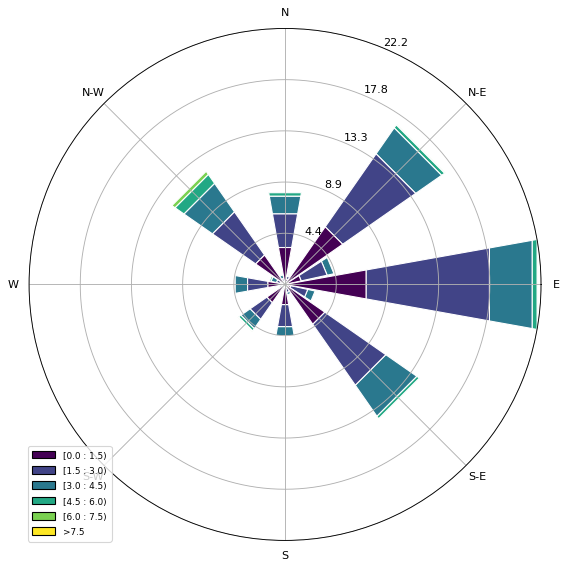

In [11]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd, ws, normed=True, opening=0.9, edgecolor='white')
ax.set_legend()

**Exercício 1**: montar uma rosa dos ventos para o período diurno e outra para o período noturno

* No período dos dados, descobrir o horário do nascer e por do sol em Curitiba
* Separar o Dataframe
* Fazer as rosas dos ventos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ws,wd (graus)
Data Hora,,
2018-11-22 23:17:47,4.1,135.0
2018-11-22 23:22:47,3.1,135.0
2018-11-22 23:27:47,2.7,90.0
2018-11-22 23:32:47,1.4,90.0
2018-11-22 23:37:47,2.4,0.0
...,...,...
2018-07-12 06:48:47,0.7,180.0
2018-07-12 06:53:47,2.4,180.0
2018-07-12 06:58:47,2.4,135.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


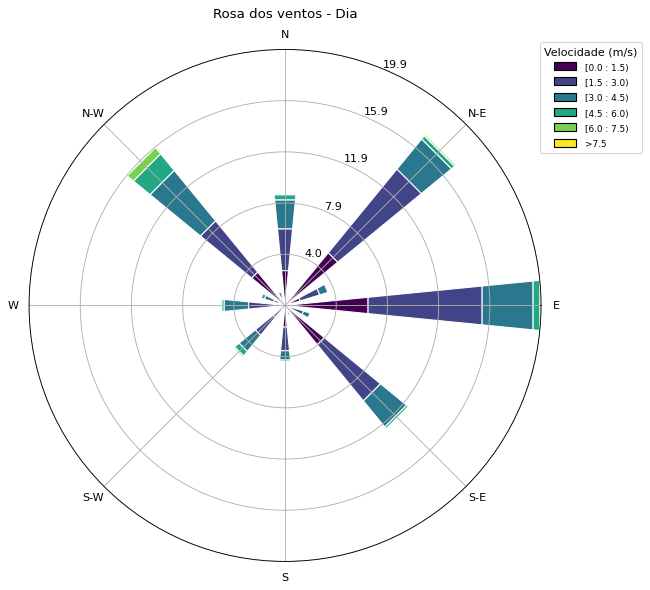

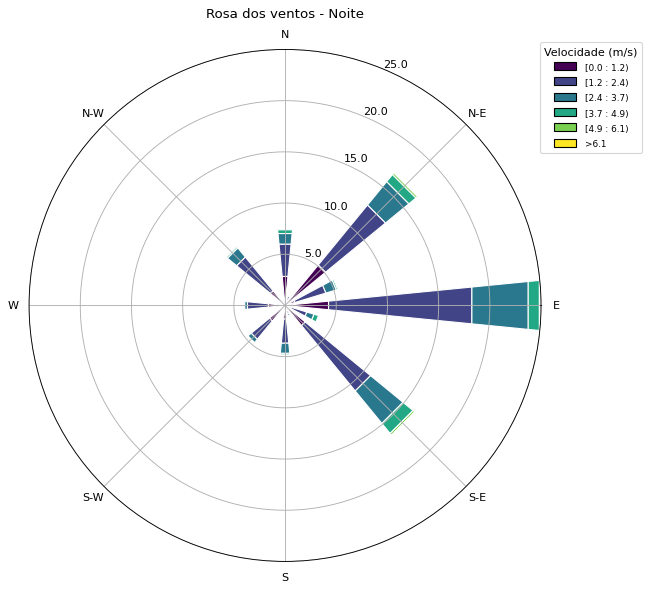

In [22]:
# Filtrando o dataframe a partir dos horarios - 05:28	dia	; 18:33 noite

novo2['Data Hora'] = pd.to_datetime(dados['Time'])
novo3 = novo2.set_index('Data Hora')
dados_diurno = novo3.between_time('05:28:00', '18:33:00')
dados_noturno = novo3.between_time('18:33:00', '05:28:00')

ws_dia = dados_diurno['ws']
wd_dia = dados_diurno['wd (graus)']
ws_noite = dados_noturno['ws']
wd_noite = dados_noturno['wd (graus)']

# Plot dia 
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd_dia, ws_dia, normed=True, opening=0.5, edgecolor='white')
ax.set_title('Rosa dos ventos - Dia')
ax.set_legend(bbox_to_anchor=(1.0,0.8),title="Velocidade (m/s)")

# Plot noite
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd_noite, ws_noite, normed=True, opening=0.5, edgecolor='white')
ax.set_title('Rosa dos ventos - Noite')
ax.set_legend(bbox_to_anchor=(1.0,0.8),title="Velocidade (m/s)")


**Exercício 2:** Calcular Temperatura do ponto de orvalho média de todo o período de medição por três métodos (A, B e C):

A) Aproximação simples da Temperatura do Ponto de Orvalho $T_{dp}$:

$T_{dp} \approx T-\frac{100-\text{RH}}{5}$

B) Magnus Formula = uma aproximação bem conhecida usada para calcular o ponto de orvalho. Dada a temperatura do ar, $T$ (Celsius) e umidade relativa (em percentagem), RH:

$\displaystyle \gamma(T,RH) =\ln\left(\frac{RH}{100}\right)+\frac{bT}{c+T}$

$\displaystyle T_{dp} = \frac{c\gamma(T,RH)}{b-\gamma(T,RH)}$

As constantes são: $b = 18.678$ e $c = 257.14$.

C) Média da coluna 'DewPoint(oC)'.

Leituras adicionais:

* https://en.wikipedia.org/wiki/Dew_point
* [Artigo: The Relationship between Relative Humidity and the Dewpoint
Temperature in Moist Air ](https://www.dropbox.com/s/nifgmwjt1ycburm/bams-86-2-225.pdf?dl=1)

A temperatura do ponto de orvalho média usando o método simples é: 15.667281553398057
A temperatura do ponto de orvalho média usando o método de Magnus é: 15.312657446017809
A temperatura do ponto de orvalho média usando a coluna DewPoint(oC) é : 15.286359223300972


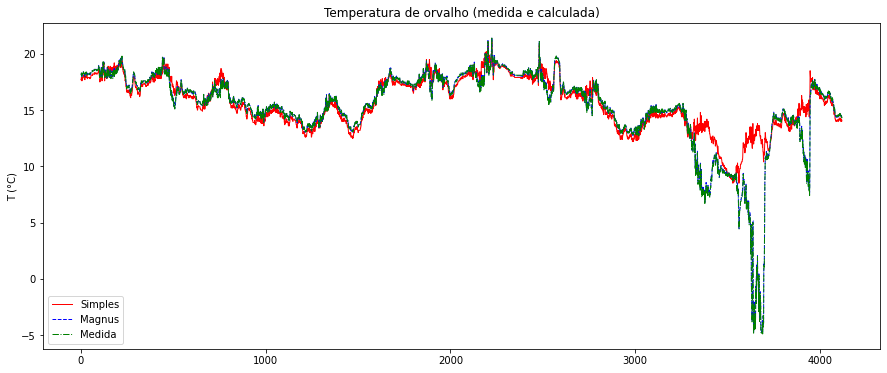

In [33]:

#Dados
RH = dados['Outdoor Humidity(%)'].values
T = dados['Outdoor Temperature(oC)'].values

#funções para cálculo da Temperatura de orvalho
def TDP (T,RH):
  Tdp = T- ((100-RH)/5)
  return Tdp

b = 18.678
c = 257.14

def magnus (T,RH):
  gama = np.log(RH/100) + (b* T/(c + T))
  Tdp_mag = c* gama/(b - gama)
  return Tdp_mag

dados['Tdp_simples'] = TDP(dados['Outdoor Temperature(oC)'],dados['Outdoor Humidity(%)'])
dados['Tdp_magnus'] = magnus(dados['Outdoor Temperature(oC)'],dados['Outdoor Humidity(%)'])
print('A temperatura do ponto de orvalho média usando o método simples é:', dados['Tdp_simples'].mean())
print('A temperatura do ponto de orvalho média usando o método de Magnus é:', dados['Tdp_magnus'].mean())
print('A temperatura do ponto de orvalho média usando a coluna DewPoint(oC) é :', dados['DewPoint(oC)'].mean())

#Plot
plt.figure(figsize=(15,6))
plt.plot(dados['Tdp_simples'],'r', label='Simples', linewidth = 1)
plt.plot(dados['Tdp_magnus'],'b', linestyle = '--', label='Magnus',linewidth = 1)
plt.plot(dados['DewPoint(oC)'], 'green',linestyle = 'dashdot', label='Medida',linewidth = 1)
plt.title('Temperatura de orvalho (medida e calculada)')
plt.ylabel('T (°C)')
plt.legend()


**Exercício 3.** Calcular o Índice de Resfriamento médio usando os dois modelos abaixo (A e B):

A) Modelo original

$ \text{WCI}=\left(10\sqrt{v}-v+10.5\right) \cdot \left(33-T_\mathrm{a}\right)$

Sendo:
* $\text{WCI}$ = wind chill index (sensação térmica), kg*cal/m<sup>2</sup>/h
* $v$ =  velocidade do vento, m/s
* $T_\mathrm{a}$ = temperatura do ar, °C

B) North American and United Kingdom wind chill index

$T_\mathrm{wc}=13.12 + 0.6215 T_\mathrm{a}-11.37 v^{+0.16} + 0.3965 T_\mathrm{a} v^{+0.16}$

Leituras adicionais:

* https://en.wikipedia.org/wiki/Wind_chill
* https://doi.org/10.1175/BAMS-86-10-1453

A média do índice de resfriamento calculado com o modelo original é: 264.2038491299893
A média do índice de resfriamento calculado com o método North American and United Kingdom é: 22.97479366292699


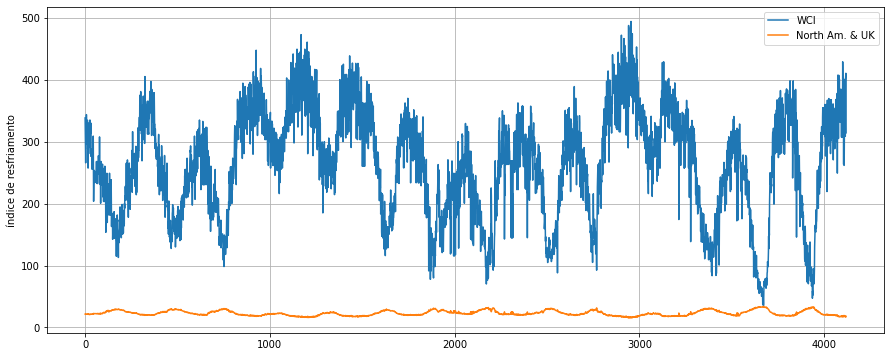

In [34]:
#Funções Chill index
def WCI (ws,T):
  wci = (10* (ws**0.5)-ws+10.5)*(33-T)
  return wci

def UKCI (ws,T):
  Twc = 13.12+0.6215*T-11.37*(ws**0.16)+0.3965*T*(ws**0.16)
  return Twc

dados['wci_df'] = WCI(dados['Wind Speed(m/s)'],dados['Outdoor Temperature(oC)'])
dados['twc_df'] = UKCI(dados['Wind Speed(m/s)'],dados['Outdoor Temperature(oC)'])
print('A média do índice de resfriamento calculado com o modelo original é:',dados['wci_df'].mean()) #Média Wci
print('A média do índice de resfriamento calculado com o método North American and United Kingdom é:',dados['twc_df'].mean()) #Média Twc

#Plot
plt.figure(figsize=(15,6))
plt.plot(dados['wci_df'], label='WCI')
plt.plot(dados['twc_df'],label='North Am. & UK')
plt.ylabel('índice de resfriamento')
plt.legend()
plt.grid()